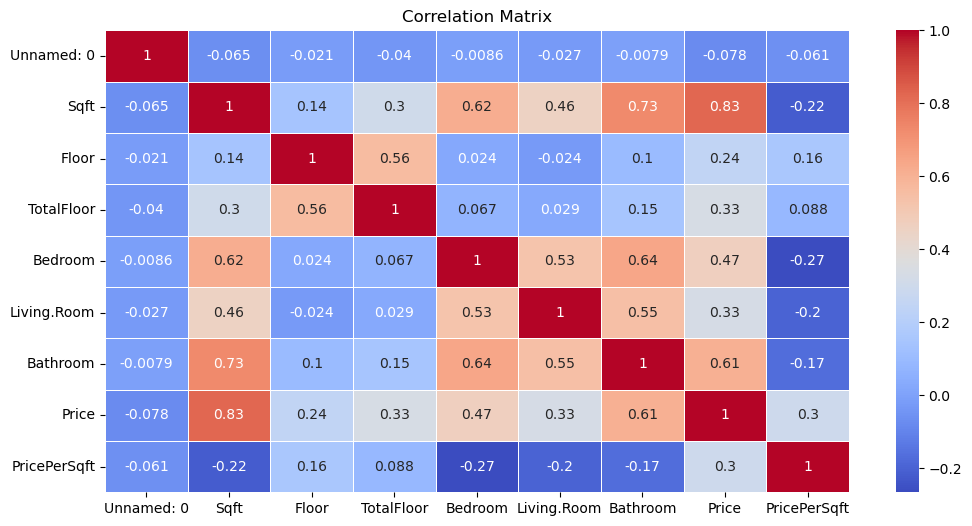

Mean Squared Error: 102566194.48192182
Root Mean Squared Error: 10127.496950477043
R-squared: 0.9285230025790918


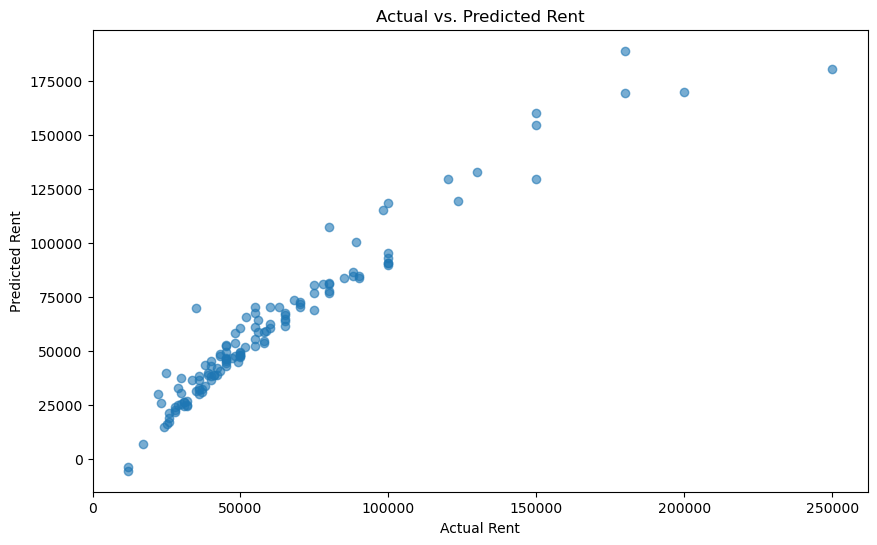

Predicted rents saved to predicted_rent_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # To save the trained model

# Load the dataset
data = pd.read_csv("C:\\Users\\dell\\Desktop\\Git ass-3\\house_rental_data.csv")

# Data preprocessing
# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables (if any)
# For example, you can use one-hot encoding for categorical variables

# Feature engineering
# You can create new features or transform existing ones based on domain knowledge
# For example, you can calculate the price per square foot
data['PricePerSqft'] = data['Price'] / data['Sqft']

# Data visualization and analysis
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Check if 'PredictedPrice' column exists before dropping it
if 'PredictedPrice' in data.columns:
    data.drop(["Price", "PricePerSqft", "PredictedPrice"], axis=1, inplace=True)  # Exclude target and auxiliary variables

# Split data into features (X) and target variable (y)
X = data.drop("Price", axis=1)  # Exclude only the target variable
y = data["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualization of model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs. Predicted Rent")
plt.show()

# Predict the rents for the entire dataset
all_X_scaled = scaler.transform(X)
all_predictions = model.predict(all_X_scaled)

# Add the predictions to the DataFrame
data['PredictedPrice'] = all_predictions

# Save the updated dataset with predicted prices to a new CSV file
data.to_csv("predicted_rent_data.csv", index=False)

# Save the trained model for future use
joblib.dump(model, "rent_prediction_model.pkl")

print("Predicted rents saved to predicted_rent_data.csv")